In [8]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [9]:
tokenizer = Tokenizer()

data = open('sonnets.txt').read()

corpus = data.lower().split('\n')

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [10]:
input_sequences[0:5]

[[34, 417],
 [34, 417, 877],
 [34, 417, 877, 166],
 [34, 417, 877, 166, 213],
 [34, 417, 877, 166, 213, 517]]

In [11]:
# pad sequences
max_sequence_len = max([len(x) for x in input_sequences]) # find out length of longest sentence
input_sequences = np.array(pad_sequences(input_sequences, maxlen = max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1], input_sequences[:,-1]

label = ku.to_categorical(label, num_classes = total_words)

In [16]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(total_words/2, kernel_regularizer = regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               320800    
_________________________________________________________________
dense (Dense)                (None, 1605)              322605    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,422,571
Trainable params: 6,422,571
Non-trainable params: 0
______________________________________________

In [17]:
 history = model.fit(predictors, label, epochs=50, verbose=1)

Train on 15462 samples
Epoch 1/50
15462/15462 [==============================] - 117s 8ms/sample - loss: 7.0441 - accuracy: 0.0213
Epoch 2/50
15462/15462 [==============================] - 74s 5ms/sample - loss: 6.4968 - accuracy: 0.0294
Epoch 3/50
15462/15462 [==============================] - 69s 4ms/sample - loss: 6.3557 - accuracy: 0.0322
Epoch 4/50
15462/15462 [==============================] - 69s 4ms/sample - loss: 6.2256 - accuracy: 0.0378
Epoch 5/50
15462/15462 [==============================] - 77s 5ms/sample - loss: 6.0758 - accuracy: 0.0439
Epoch 6/50
15462/15462 [==============================] - 77s 5ms/sample - loss: 5.9156 - accuracy: 0.0523
Epoch 7/50
15462/15462 [==============================] - 74s 5ms/sample - loss: 5.7460 - accuracy: 0.0620
Epoch 8/50
15462/15462 [==============================] - 72s 5ms/sample - loss: 5.6089 - accuracy: 0.0684s - loss: 5.6052 - accuracy
Epoch 9/50
15462/15462 [==============================] - 76s 5ms/sample - loss: 5.4488 - acc

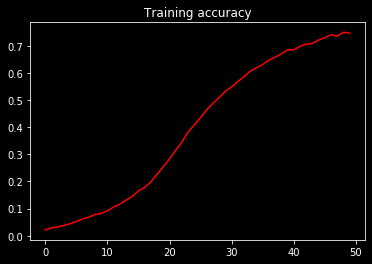

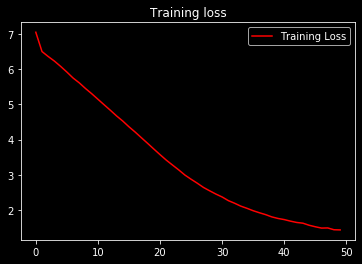

In [20]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [19]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope of this wherewith do lie again to give decay remember thee remain remain bosom's writ took up win pleasure doth use thee go doth go in ill half lost you did bitter chary take me say thee so due so thine is thee alone alone away assured first done not so do not to thee old sky part some near slain slain done say when it ' thee remain as begin begin gone by his state her pain be twain assured mine true appetite doth give hide assured thine own 'will ' bail shall come with score away away assured
